**Attribute Classification and Re-Identification onMarket-1051 Dataset**

*Trento University Artificial Intelligence Department Deep Learning Course Project*


*   Prof: [Elisa Ricci](http://elisaricci.eu) 
*   Teaching Assistant: [Willi Menapace ](https://www.willimenapace.com)

**Students**

*   Ali Akay
*   Mert Akkor



In [ ]:
# General libraries
import pandas as pd  #For working with dataframes
import numpy as np   #For working with image arrays
import cv2          #For transforming image
import matplotlib.pyplot as plt  #For representation
#For model building
import torch
from torch import nn, optim
import torchvision
from torchvision import transforms, datasets, models, utils
from torch.utils.data import Dataset, DataLoader 
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.nn import functional as F
from skimage import io, transform
from torch.optim import lr_scheduler
from skimage.transform import AffineTransform, warp
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
# import necessary libraries
import torch 
import torchvision
import torch.nn.functional as F
import torchvision.transforms as T
import pandas as pd
import os  
from __future__ import print_function, division
import os

from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Library needed for visualization purposes
from torch.utils.tensorboard import SummaryWriter


In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')


In [ ]:
!unzip -q "/content/drive/My Drive/dataset"

In [ ]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
torch.cuda.is_available()

True

In [ ]:
print(torch.__version__)

1.9.0


In [ ]:
import os
os.getcwd()
# place the files in your IDE working dicrectory .
labels = pd.read_csv(r'annotations_train.csv')


In [ ]:
labels

,id,age,backpack,bag,handbag,clothes,down,up,hair,hat,...,upgreen,downblack,downwhite,downpink,downpurple,downyellow,downgray,downblue,downgreen,downbrown
0,474,2,1,1,1,1,2,2,2,1,...,1,1,2,1,1,1,1,1,1,1
1,857,2,1,2,1,2,2,2,2,1,...,1,1,1,1,1,1,1,1,1,2
2,1487,2,2,1,1,2,2,2,1,1,...,1,1,1,1,1,1,1,2,1,1
3,1422,2,1,2,1,2,2,2,1,1,...,1,2,1,1,1,1,1,1,1,1
4,856,2,2,1,1,2,2,2,2,1,...,1,2,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,350,2,1,1,1,2,2,2,1,1,...,1,1,1,1,1,1,2,1,1,1
747,1411,2,1,2,1,1,2,2,1,1,...,1,1,2,1,1,1,1,1,1,1
748,959,2,1,1,1,2,2,2,1,1,...,1,2,1,1,1,1,1,1,1,1
749,852,2,1,1,1,2,1,2,1,1,...,1,2,1,1,1,1,1,1,1,1


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Data Preparation Part

---



In [ ]:
labels.head()

,id,age,backpack,bag,handbag,clothes,down,up,hair,hat,...,upgreen,downblack,downwhite,downpink,downpurple,downyellow,downgray,downblue,downgreen,downbrown
0,474,2,1,1,1,1,2,2,2,1,...,1,1,2,1,1,1,1,1,1,1
1,857,2,1,2,1,2,2,2,2,1,...,1,1,1,1,1,1,1,1,1,2
2,1487,2,2,1,1,2,2,2,1,1,...,1,1,1,1,1,1,1,2,1,1
3,1422,2,1,2,1,2,2,2,1,1,...,1,2,1,1,1,1,1,1,1,1
4,856,2,2,1,1,2,2,2,2,1,...,1,2,1,1,1,1,1,1,1,1


In [ ]:
train = os.listdir("train")

In [ ]:
train[:2]

['0002_c1_016620005.jpg', '0002_c3_010187163.jpg']

In [ ]:
 id=[]
 camera=[]
 num=[]
 for f in train:
    id.append(f.split("_")[0])
    camera.append(f.split("_")[1])
    num.append(f.split("_")[2])




In [ ]:
id=pd.DataFrame(id)
camera=pd.DataFrame(camera)
num=pd.DataFrame(num)

dt=pd.concat([id,camera,num],axis=1)
dt.columns=["id","camera","num"]
dt["path"]=dt["id"]+"_"+dt["camera"]+"_"+dt["num"]


In [ ]:
dt["id"]=dt["id"].astype(int)

In [ ]:
dt

,id,camera,num,path
0,2,c1,016620005.jpg,0002_c1_016620005.jpg
1,2,c3,010187163.jpg,0002_c3_010187163.jpg
2,2,c3,027735928.jpg,0002_c3_027735928.jpg
3,2,c3,093017288.jpg,0002_c3_093017288.jpg
4,2,c5,040638433.jpg,0002_c5_040638433.jpg
...,...,...,...,...
12984,1501,c6,048805852.jpg,1501_c6_048805852.jpg
12985,1501,c6,054405564.jpg,1501_c6_054405564.jpg
12986,1501,c6,072640762.jpg,1501_c6_072640762.jpg
12987,1501,c6,083356185.jpg,1501_c6_083356185.jpg


In [ ]:
dt=pd.merge(labels, dt,on="id")
dt=dt[["path","gender",'age', 'backpack', 'bag', 'handbag', 'clothes',
       'down', 'up', 'hair', 'hat', 'upblack', 'upwhite', 'upred',
       'uppurple', 'upyellow', 'upgray', 'upblue', 'upgreen', 'downblack',
       'downwhite', 'downpink', 'downpurple', 'downyellow', 'downgray',
       'downblue', 'downgreen', 'downbrown']]
dt.iloc[dt.index,1:28]=dt.iloc[dt.index,1:28]-1
dt.head()

,path,gender,age,backpack,bag,handbag,clothes,down,up,hair,...,upgreen,downblack,downwhite,downpink,downpurple,downyellow,downgray,downblue,downgreen,downbrown
0,0474_c1_011140712.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1,0474_c1_015091412.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0474_c1_017345506.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,0474_c1_032618193.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0474_c1_043109826.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
dt.iloc[dt.index,19:28][dt.iloc[dt.index,19:28].sum(axis=1)==0]

,downblack,downwhite,downpink,downpurple,downyellow,downgray,downblue,downgreen,downbrown
181,0,0,0,0,0,0,0,0,0
182,0,0,0,0,0,0,0,0,0
183,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
12468,0,0,0,0,0,0,0,0,0
12469,0,0,0,0,0,0,0,0,0
12470,0,0,0,0,0,0,0,0,0
12471,0,0,0,0,0,0,0,0,0


In [ ]:
dt=dt.assign(upmulticolor=np.where(dt.iloc[dt.index,11:19].sum(axis=1)==0, 1, 0))

In [ ]:
dt=dt.assign(downmulticolor=np.where(dt.iloc[dt.index,19:28].sum(axis=1)==0, 1, 0))

In [ ]:
dt=dt[["path","gender","age",'backpack', 'bag', 'handbag', 'clothes',
       'down', 'up', 'hair', 'hat', "upmulticolor",'upblack', 'upwhite', 'upred',
       'uppurple', 'upyellow', 'upgray', 'upblue', 'upgreen',"downmulticolor", 'downblack',
       'downwhite', 'downpink', 'downpurple', 'downyellow', 'downgray',
       'downblue', 'downgreen', 'downbrown']]
       
dt.to_csv("new_annotation.csv")


In [ ]:
dt

,path,gender,age,backpack,bag,handbag,clothes,down,up,hair,...,downmulticolor,downblack,downwhite,downpink,downpurple,downyellow,downgray,downblue,downgreen,downbrown
0,0474_c1_011140712.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1,0474_c1_015091412.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0474_c1_017345506.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,0474_c1_032618193.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0474_c1_043109826.jpg,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12984,1177_c3_011636446.jpg,1,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
12985,1177_c3_037640775.jpg,1,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
12986,1177_c3_099386977.jpg,1,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
12987,1177_c6_001668358.jpg,1,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
dt.iloc[dt.index,11:20]

,upmulticolor,upblack,upwhite,upred,uppurple,upyellow,upgray,upblue,upgreen
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
12984,0,0,1,0,0,0,0,0,0
12985,0,0,1,0,0,0,0,0,0
12986,0,0,1,0,0,0,0,0,0
12987,0,0,1,0,0,0,0,0,0


In [ ]:
dt.iloc[dt.index,20:30]

,downmulticolor,downblack,downwhite,downpink,downpurple,downyellow,downgray,downblue,downgreen,downbrown
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
12984,0,0,1,0,0,0,0,0,0,0
12985,0,0,1,0,0,0,0,0,0,0
12986,0,0,1,0,0,0,0,0,0,0
12987,0,0,1,0,0,0,0,0,0,0


In [ ]:
dt['upcolor'] = dt.iloc[dt.index,11:20].idxmax(axis=1)

In [ ]:
dt['downcolor'] = dt.iloc[dt.index,20:30].idxmax(axis=1)

In [ ]:
dt = dt[["path","gender","age",'backpack', 'bag', 'handbag', 'clothes',
       'down', 'up', 'hair', 'hat', 'upcolor', 'downcolor']]

In [ ]:
dt

,path,gender,age,backpack,bag,handbag,clothes,down,up,hair,hat,upcolor,downcolor
0,0474_c1_011140712.jpg,1,1,0,0,0,0,1,1,1,0,upwhite,downwhite
1,0474_c1_015091412.jpg,1,1,0,0,0,0,1,1,1,0,upwhite,downwhite
2,0474_c1_017345506.jpg,1,1,0,0,0,0,1,1,1,0,upwhite,downwhite
3,0474_c1_032618193.jpg,1,1,0,0,0,0,1,1,1,0,upwhite,downwhite
4,0474_c1_043109826.jpg,1,1,0,0,0,0,1,1,1,0,upwhite,downwhite
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12984,1177_c3_011636446.jpg,1,1,1,0,0,1,1,1,1,0,upwhite,downwhite
12985,1177_c3_037640775.jpg,1,1,1,0,0,1,1,1,1,0,upwhite,downwhite
12986,1177_c3_099386977.jpg,1,1,1,0,0,1,1,1,1,0,upwhite,downwhite
12987,1177_c6_001668358.jpg,1,1,1,0,0,1,1,1,1,0,upwhite,downwhite


In [ ]:
label_encoder = preprocessing.LabelEncoder()
dt['upcolor']= label_encoder.fit_transform(dt['upcolor'])
dt['downcolor'] = label_encoder.fit_transform(dt['downcolor'])

<ipython-input-28-bf13e6370486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['upcolor']= label_encoder.fit_transform(dt['upcolor'])
<ipython-input-28-bf13e6370486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['downcolor'] = label_encoder.fit_transform(dt['downcolor'])


In [ ]:
dt.head()

,path,gender,age,backpack,bag,handbag,clothes,down,up,hair,hat,upcolor,downcolor
0,0474_c1_011140712.jpg,1,1,0,0,0,0,1,1,1,0,7,8
1,0474_c1_015091412.jpg,1,1,0,0,0,0,1,1,1,0,7,8
2,0474_c1_017345506.jpg,1,1,0,0,0,0,1,1,1,0,7,8
3,0474_c1_032618193.jpg,1,1,0,0,0,0,1,1,1,0,7,8
4,0474_c1_043109826.jpg,1,1,0,0,0,0,1,1,1,0,7,8


In [ ]:
dt.to_csv('new_annotation.csv')

In [ ]:
df = pd.read_csv('new_annotation.csv',index_col=[0])
df.head()

,path,gender,age,backpack,bag,handbag,clothes,down,up,hair,hat,upcolor,downcolor
0,0474_c1_011140712.jpg,1,1,0,0,0,0,1,1,1,0,7,8
1,0474_c1_015091412.jpg,1,1,0,0,0,0,1,1,1,0,7,8
2,0474_c1_017345506.jpg,1,1,0,0,0,0,1,1,1,0,7,8
3,0474_c1_032618193.jpg,1,1,0,0,0,0,1,1,1,0,7,8
4,0474_c1_043109826.jpg,1,1,0,0,0,0,1,1,1,0,7,8


In [ ]:
df.upcolor.value_counts()

7    3695
0    1774
2    1501
6    1408
1    1185
4    1133
8     983
3     883
5     427
Name: upcolor, dtype: int64

In [ ]:
annotations = pd.read_csv("new_annotation.csv",index_col=[0])
annotations

,path,gender,age,backpack,bag,handbag,clothes,down,up,hair,hat,upcolor,downcolor
0,0474_c1_011140712.jpg,1,1,0,0,0,0,1,1,1,0,7,8
1,0474_c1_015091412.jpg,1,1,0,0,0,0,1,1,1,0,7,8
2,0474_c1_017345506.jpg,1,1,0,0,0,0,1,1,1,0,7,8
3,0474_c1_032618193.jpg,1,1,0,0,0,0,1,1,1,0,7,8
4,0474_c1_043109826.jpg,1,1,0,0,0,0,1,1,1,0,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12984,1177_c3_011636446.jpg,1,1,1,0,0,1,1,1,1,0,7,8
12985,1177_c3_037640775.jpg,1,1,1,0,0,1,1,1,1,0,7,8
12986,1177_c3_099386977.jpg,1,1,1,0,0,1,1,1,1,0,7,8
12987,1177_c6_001668358.jpg,1,1,1,0,0,1,1,1,1,0,7,8


We are going to split from 9627 into train and validation size (%37)


In [ ]:
annotations[:9629]

,path,gender,age,backpack,bag,handbag,clothes,down,up,hair,hat,upcolor,downcolor
0,0474_c1_011140712.jpg,1,1,0,0,0,0,1,1,1,0,7,8
1,0474_c1_015091412.jpg,1,1,0,0,0,0,1,1,1,0,7,8
2,0474_c1_017345506.jpg,1,1,0,0,0,0,1,1,1,0,7,8
3,0474_c1_032618193.jpg,1,1,0,0,0,0,1,1,1,0,7,8
4,0474_c1_043109826.jpg,1,1,0,0,0,0,1,1,1,0,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,0167_c6_086385717.jpg,1,1,0,0,1,1,1,1,1,0,7,0
9625,0167_c6_093611765.jpg,1,1,0,0,1,1,1,1,1,0,7,0
9626,0167_c6_099027329.jpg,1,1,0,0,1,1,1,1,1,0,7,0
9627,0849_c1_022576072.jpg,1,1,0,0,1,0,1,1,1,0,6,6


In [ ]:
annotations.columns

Index(['path', 'gender', 'age', 'backpack', 'bag', 'handbag', 'clothes',
       'down', 'up', 'hair', 'hat', 'upcolor', 'downcolor'],
      dtype='object')

In [ ]:
annotations.age.value_counts()

1    10660
2     2039
3      186
0      104
Name: age, dtype: int64

In [ ]:
img_path = os.path.join("/content/train/",str(annotations.iloc[annotations.index, 0]))
img_path

'/content/train/0        0474_c1_011140712.jpg\n1        0474_c1_015091412.jpg\n2        0474_c1_017345506.jpg\n3        0474_c1_032618193.jpg\n4        0474_c1_043109826.jpg\n                 ...          \n12984    1177_c3_011636446.jpg\n12985    1177_c3_037640775.jpg\n12986    1177_c3_099386977.jpg\n12987    1177_c6_001668358.jpg\n12988    1177_c6_078276224.jpg\nName: path, Length: 12989, dtype: object'

In [ ]:
from torchvision.io import read_image
class custom_dataset(Dataset):
    def __init__(self, csv_file, root_dir, transform):
        self.annotations = pd.read_csv(csv_file,index_col=[0])
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir,str(self.annotations.iloc[index, 0]))
        image = read_image(img_path)
        image=image.squeeze().permute(1,2,0)
        label_gender=np.array([self.annotations.iloc[index,1]]).astype('float')
        label_age=np.array([self.annotations.iloc[index,2]]).astype('float')
        label_backpack=np.array([self.annotations.iloc[index,3]]).astype('float')
        label_bag=np.array([self.annotations.iloc[index,4]]).astype('float')
        label_handbag=np.array([self.annotations.iloc[index,5]]).astype('float')
        label_clothes=np.array([self.annotations.iloc[index,6]]).astype('float')
        label_down=np.array([self.annotations.iloc[index,7]]).astype('float')
        label_up=np.array([self.annotations.iloc[index,8]]).astype('float')
        label_hair=np.array([self.annotations.iloc[index,9]]).astype('float')
        label_hat=np.array([self.annotations.iloc[index,10]]).astype('float')
        label_upcolor=np.array([self.annotations.iloc[index,11]]).astype('float')
        label_downcolor=np.array([self.annotations.iloc[index,12]]).astype('float')

        sample={"image":np.uint8(image),'label_gender': label_gender,\
                'label_age': label_age,\
                'label_backpack': label_backpack,\
                'label_bag': label_bag,\
                'label_handbag': label_handbag,\
                'label_clothes': label_clothes,\
                'label_down': label_down,\
                'label_up': label_up,\
                'label_hair': label_hair,\
                'label_hat': label_hat,\
                'label_upcolor': label_upcolor,\
                'label_downcolor': label_downcolor}

        if self.transform:
            sample["image"] = self.transform(sample["image"])
            
       
        return (sample)

In [ ]:
dataset = custom_dataset(
        csv_file="new_annotation.csv",
        root_dir="/content/train/",
        transform=transform)

**To Split Train-Valid**

In [ ]:
import numpy as np
from torch.utils.data import Dataset


class GenHelper(Dataset):
    def __init__(self, mother, length, mapping):
        # here is a mapping from this index to the mother ds index
        self.mapping=mapping
        self.length=length
        self.mother=mother

    def __getitem__(self, index):
        return self.mother[self.mapping[index]]

    def __len__(self):
        return self.length


def train_valid_split(ds, random_seed=None):
    '''
    This is a pytorch generic function that takes a data.Dataset object and splits it to validation and training
    efficiently.
    :return:
    '''
    if random_seed!=None:
        np.random.seed(random_seed)

    dslen=len(dataset)
    
    indices= list(range(dslen))
    
    train_size=9627
    print("train Size: ",train_size)
    train_mapping=indices[:train_size]
    valid_mapping=indices[train_size:]
    train=GenHelper(ds, train_size, train_mapping)
    valid=GenHelper(ds, dslen - train_size, valid_mapping)
    

    return train, valid

In [ ]:
transform = list()
transform.append(T.ToPILImage())
transform.append(T.RandomHorizontalFlip(p=0.9))
#transform.append(T.Resize((256, 256)))                      # Resize each PIL image to 256 x 256
#transform.append(T.RandomCrop((224)))                  # Randonly crop a 224 x 224 patch
transform.append(T.ToTensor())                              # converts Numpy to Pytorch Tensor
transform.append(T.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])) 
#transform.append(T.RandomErasing())
transform = T.Compose(transform)

In [ ]:
def get_data_(batch_size):
  # Load data
  dataset = custom_dataset(
      csv_file="new_annotation.csv",
      root_dir="train/",
      transform=transform)
      #transforms.Compose([RGB_ToTensor(),Normalization(cnn_normalization_mean,cnn_normalization_std)]))
      
  train,valid=train_valid_split(dataset, random_seed=None)

  # Initialize dataloaders
  train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
  valid_loader = torch.utils.data.DataLoader(valid, batch_size, shuffle=False)
  
  return train_loader, valid_loader

In [ ]:
train_loader,valid_loader=get_data_(batch_size=128)

train Size:  9627


In [ ]:
len(train_loader)

76

In [ ]:
len(valid_loader)

27

In [ ]:
train_loader

In [ ]:
train = next(iter(train_loader))

In [ ]:
train["image"].shape

torch.Size([128, 3, 128, 64])

In [ ]:
len(train["image"])

128

In [ ]:
train["image"][1].shape

torch.Size([3, 128, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


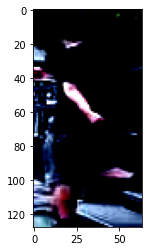

Label_upcolor: tensor([0.], dtype=torch.float64)


In [ ]:
train = next(iter(train_loader))
img = train["image"][1].squeeze().permute(1,2,0)
label = train["label_upcolor"][1]
plt.imshow(img)
plt.show()
print(f"Label_upcolor: {label}")

In [ ]:
train['label_gender'].squeeze(1)

tensor([1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
        1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
        0., 1.], dtype=torch.float64)

In [ ]:
from PIL import Image
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Pre Trained Resnet Model**

In [ ]:
class ResNet50(nn.Module):
    def __init__(self, **kwargs):
        super(ResNet50, self).__init__()
        resnet50 = torchvision.models.resnet50(pretrained=True)
        self.base = nn.Sequential(*list(resnet50.children())[:-1])
                #last layers
        #1000),nn.BatchNorm1d(1000),nn.ReLU(),nn.Dropout(0.50),nn.Linear(1000,
        self.fc1 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,2))
        self.fc2 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,4))
        self.fc3 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,2))
        self.fc4 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,2))
        self.fc5 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,2))
        self.fc6 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,2))
        self.fc7 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,2))
        self.fc8 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,2))
        self.fc9 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,2))
        self.fc10 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,2))
        self.fc11 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,9))
        self.fc12 = nn.Sequential(nn.Linear(2048,1000),nn.ReLU(),nn.Linear(1000,10))
        self.feat_dim = 2048

    def forward(self, x):
        x = self.base(x) #torch.Size([128, 2048, 1, 1])
        #x = F.avg_pool2d(x, x.size()[2:])
        f = x.view(x.size(0), -1) #torch.Size([128, 2048])

        label_gender = self.fc1(f)
        label_age=  self.fc2(f)
        label_backpack= self.fc3(f) 
        label_bag= self.fc4(f)
        label_handbag= self.fc5(f) 
        label_clothes= self.fc6(f)
        label_down= self.fc7(f) 
        label_up= self.fc8(f) 
        label_hair= self.fc9(f)
        label_hat= self.fc10(f) 
        label_upcolor= self.fc11(f) 
        label_downcolor= self.fc12(f)

        return {'label_gender': label_gender,\
                'label_age': label_age,\
                'label_backpack': label_backpack,\
                'label_bag': label_bag,\
                'label_handbag': label_handbag,\
                'label_clothes': label_clothes,\
                'label_down': label_down,\
                'label_up': label_up,\
                'label_hair': label_hair,\
                'label_hat': label_hat,\
                'label_upcolor': label_upcolor,\
                'label_downcolor': label_downcolor}

model=ResNet50().to(device)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\merta/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100.0%


In [ ]:
#avg_pool operation to 'AdaptiveAvgPool2d' your model will work for any image size
model

ResNet50(
  (base): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 25

In [ ]:
from torchvision import transforms, datasets, models, utils
#Setting model and moving to device
#model_resnet=my_extended_model.to(device)
#model_resnet= ResNet50().to(device)
#model_resnet =CnnModel().to(device)
#optimizer = optim.Adam(model_resnet.parameters(),lr=0.001)

In [ ]:
def train_model(model,train_loader,criterion_mo,optimizer):
  train_loss = 0.0
  model.train()
  samples= 0.0
  cumulative_train_loss = 0.0
  cumulative_accuracy1=0
  cumulative_accuracy2=0
  cumulative_accuracy3=0
  cumulative_accuracy4=0
  cumulative_accuracy5=0
  cumulative_accuracy6=0
  cumulative_accuracy7=0
  cumulative_accuracy8=0
  cumulative_accuracy9=0
  cumulative_accuracy10=0
  cumulative_accuracy11=0
  cumulative_accuracy12=0
  counter=0
  for batch_idx, sample_batched in enumerate(train_loader):
      counter+=1
          # importing data and moving to GPU
      image, label1, label2, label3, label4, label5, label6, label7, label8, label9,label10,label11,label12 = sample_batched['image'].to(device),\
                                                  sample_batched['label_gender'].to(device),\
                                                    sample_batched['label_age'].to(device),\
                                                    sample_batched['label_backpack'].to(device),\
                                                    sample_batched['label_bag'].to(device),\
                                                    sample_batched['label_handbag'].to(device),\
                                                    sample_batched['label_clothes'].to(device),\
                                                    sample_batched['label_down'].to(device),\
                                                    sample_batched['label_up'].to(device),\
                                                    sample_batched['label_hair'].to(device),\
                                                    sample_batched['label_hat'].to(device),\
                                                    sample_batched['label_upcolor'].to(device),\
                                                    sample_batched['label_downcolor'].to(device)                          
                                      
              # zero the parameter gradients
      
      output=model(image.float())
                  
      label1_hat=output['label_gender'].to(device)
      label2_hat=output['label_age'].to(device)
      label3_hat=output['label_backpack'].to(device)
      label4_hat=output['label_bag'].to(device)
      label5_hat=output['label_handbag'].to(device)
      label6_hat=output['label_clothes'].to(device)
      label7_hat=output['label_down'].to(device)
      label8_hat=output['label_up'].to(device)
      label9_hat=output['label_hair'].to(device)
      label10_hat=output['label_hat'].to(device)
      label11_hat=output['label_upcolor'].to(device)
      label12_hat=output['label_downcolor'].to(device)
                  # calculate loss
      loss1=criterion_mo(label1_hat,label1.type(torch.LongTensor).squeeze(1).to(device))
      loss2=criterion_mo(label2_hat,label2.type(torch.LongTensor).squeeze(1).to(device))
      loss3=criterion_mo(label3_hat,label3.type(torch.LongTensor).squeeze(1).to(device))
      loss4=criterion_mo(label4_hat,label4.type(torch.LongTensor).squeeze(1).to(device))
      loss5=criterion_mo(label5_hat,label5.type(torch.LongTensor).squeeze(1).to(device))
      loss6=criterion_mo(label6_hat,label6.type(torch.LongTensor).squeeze(1).to(device))
      loss7=criterion_mo(label7_hat,label7.type(torch.LongTensor).squeeze(1).to(device))
      loss8=criterion_mo(label8_hat,label8.type(torch.LongTensor).squeeze(1).to(device))
      loss9=criterion_mo(label9_hat,label9.type(torch.LongTensor).squeeze(1).to(device))
      loss10=criterion_mo(label10_hat,label10.type(torch.LongTensor).squeeze(1).to(device))
      loss11=criterion_mo(label11_hat,label11.type(torch.LongTensor).squeeze(1).to(device))
      loss12=criterion_mo(label12_hat,label12.type(torch.LongTensor).squeeze(1).to(device))
                          
      loss=(loss1+loss2+loss3+loss4+loss5+loss6+loss7+loss8+loss9+loss10+loss11+loss12)/12
        
      # Backward pass
      loss.backward()
    
      # Update parameters
      optimizer.step()
    
      # Resets the gradients
      optimizer.zero_grad()

      samples += image.shape[0]
      cumulative_train_loss += loss.item()

      train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

      _, predicted1 = label1_hat.max(1)
      _, predicted2 = label2_hat.max(1)
      _, predicted3 = label3_hat.max(1)
      _, predicted4 = label4_hat.max(1)
      _, predicted5 = label5_hat.max(1)
      _, predicted6 = label6_hat.max(1)
      _, predicted7 = label7_hat.max(1)
      _, predicted8 = label8_hat.max(1)
      _, predicted9 = label9_hat.max(1)
      _, predicted10 = label10_hat.max(1)
      _, predicted11 = label11_hat.max(1)
      _, predicted12 = label12_hat.max(1)

      cumulative_accuracy1 += predicted1.eq(label1.squeeze(1)).sum().item()
      cumulative_accuracy2 += predicted2.eq(label2.squeeze(1)).sum().item()
      cumulative_accuracy3 += predicted3.eq(label3.squeeze(1)).sum().item()
      cumulative_accuracy4 += predicted4.eq(label4.squeeze(1)).sum().item()
      cumulative_accuracy5 += predicted5.eq(label5.squeeze(1)).sum().item()
      cumulative_accuracy6 += predicted6.eq(label6.squeeze(1)).sum().item()
      cumulative_accuracy7 += predicted7.eq(label7.squeeze(1)).sum().item()
      cumulative_accuracy8 += predicted8.eq(label8.squeeze(1)).sum().item()
      cumulative_accuracy9 += predicted9.eq(label9.squeeze(1)).sum().item()
      cumulative_accuracy10 += predicted10.eq(label10.squeeze(1)).sum().item()
      cumulative_accuracy11 += predicted11.eq(label11.squeeze(1)).sum().item()
      cumulative_accuracy12 += predicted12.eq(label12.squeeze(1)).sum().item()

  return train_loss, cumulative_accuracy1 / samples * 100,  cumulative_accuracy2 / samples * 100, cumulative_accuracy3 / samples * 100, cumulative_accuracy4 / samples * 100, cumulative_accuracy5 / samples * 100, cumulative_accuracy6 / samples * 100, cumulative_accuracy7 / samples * 100, cumulative_accuracy8 / samples * 100, cumulative_accuracy9 / samples * 100, cumulative_accuracy10 / samples * 100, cumulative_accuracy11 / samples * 100,cumulative_accuracy12 / samples * 100

In [ ]:
def valid_model(model,valid_loader ,criterion_mo):
    cumulative_valid_loss=0.
    cumulative_accuracy = 0.
    valid_loss=0.
    best=np.inf
    model.eval()
    samples=0.
    cumulative_accuracy1=0
    cumulative_accuracy2=0
    cumulative_accuracy3=0
    cumulative_accuracy4=0
    cumulative_accuracy5=0
    cumulative_accuracy6=0
    cumulative_accuracy7=0
    cumulative_accuracy8=0
    cumulative_accuracy9=0
    cumulative_accuracy10=0
    cumulative_accuracy11=0
    cumulative_accuracy12=0
    with torch.no_grad():
      for batch_idx, sample_batched in enumerate(valid_loader):
              # importing data and moving to GPU
          image, label1, label2, label3, label4, label5, label6, label7, label8, label9,label10,label11,label12 = sample_batched['image'].to(device),\
                                                  sample_batched['label_gender'].to(device),\
                                                    sample_batched['label_age'].to(device),\
                                                    sample_batched['label_backpack'].to(device),\
                                                    sample_batched['label_bag'].to(device),\
                                                    sample_batched['label_handbag'].to(device),\
                                                    sample_batched['label_clothes'].to(device),\
                                                    sample_batched['label_down'].to(device),\
                                                    sample_batched['label_up'].to(device),\
                                                    sample_batched['label_hair'].to(device),\
                                                    sample_batched['label_hat'].to(device),\
                                                    sample_batched['label_upcolor'].to(device),\
                                                    sample_batched['label_downcolor'].to(device)
                  
          output=model(image.float())
          label1_hat=output['label_gender'].to(device)
          label2_hat=output['label_age'].to(device)
          label3_hat=output['label_backpack'].to(device)
          label4_hat=output['label_bag'].to(device)
          label5_hat=output['label_handbag'].to(device)
          label6_hat=output['label_clothes'].to(device)
          label7_hat=output['label_down'].to(device)
          label8_hat=output['label_up'].to(device)
          label9_hat=output['label_hair'].to(device)
          label10_hat=output['label_hat'].to(device)
          label11_hat=output['label_upcolor'].to(device)
          label12_hat=output['label_downcolor'].to(device)
              # calculate loss
              # calculate loss
          loss1=criterion_mo(label1_hat, label1.type(torch.LongTensor).squeeze(1).to(device))
          loss2=criterion_mo(label2_hat, label2.type(torch.LongTensor).squeeze(1).to(device))
          loss3=criterion_mo(label3_hat,label3.type(torch.LongTensor).squeeze(1).to(device))
          loss4=criterion_mo(label4_hat,label4.type(torch.LongTensor).squeeze(1).to(device))
          loss5=criterion_mo(label5_hat,label5.type(torch.LongTensor).squeeze(1).to(device))
          loss6=criterion_mo(label6_hat,label6.type(torch.LongTensor).squeeze(1).to(device))
          loss7=criterion_mo(label7_hat,label7.type(torch.LongTensor).squeeze(1).to(device))
          loss8=criterion_mo(label8_hat,label8.type(torch.LongTensor).squeeze(1).to(device))
          loss9=criterion_mo(label9_hat,label9.type(torch.LongTensor).squeeze(1).to(device))
          loss10=criterion_mo(label10_hat,label10.type(torch.LongTensor).squeeze(1).to(device))
          loss11=criterion_mo(label11_hat.to(device), label11.type(torch.LongTensor).squeeze(1).to(device))
          loss12=criterion_mo(label12_hat.to(device), label12.type(torch.LongTensor).squeeze(1).to(device))
                              
          loss=(loss1+loss2+loss3+loss4+loss5+loss6+loss7+loss8+loss9+loss10+loss11+loss12)/12

          samples+=image.shape[0]
          cumulative_valid_loss += loss.item()
          valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))  

          _, predicted1 = label1_hat.max(1)
          _, predicted2 = label2_hat.max(1)
          _, predicted3 = label3_hat.max(1)
          _, predicted4 = label4_hat.max(1)
          _, predicted5 = label5_hat.max(1)
          _, predicted6 = label6_hat.max(1)
          _, predicted7 = label7_hat.max(1)
          _, predicted8 = label8_hat.max(1)
          _, predicted9 = label9_hat.max(1)
          _, predicted10 = label10_hat.max(1)
          _, predicted11 = label11_hat.max(1)
          _, predicted12 = label12_hat.max(1)

          

          cumulative_accuracy1 += predicted1.eq(label1.squeeze(1)).sum().item()
          cumulative_accuracy2 += predicted2.eq(label2.squeeze(1)).sum().item()
          cumulative_accuracy3 += predicted3.eq(label3.squeeze(1)).sum().item()
          cumulative_accuracy4 += predicted4.eq(label4.squeeze(1)).sum().item()
          cumulative_accuracy5 += predicted5.eq(label5.squeeze(1)).sum().item()
          cumulative_accuracy6 += predicted6.eq(label6.squeeze(1)).sum().item()
          cumulative_accuracy7 += predicted7.eq(label7.squeeze(1)).sum().item()
          cumulative_accuracy8 += predicted8.eq(label8.squeeze(1)).sum().item()
          cumulative_accuracy9 += predicted9.eq(label9.squeeze(1)).sum().item()
          cumulative_accuracy10 += predicted10.eq(label10.squeeze(1)).sum().item()
          cumulative_accuracy11 += predicted11.eq(label11.squeeze(1)).sum().item()
          cumulative_accuracy12 += predicted12.eq(label12.squeeze(1)).sum().item()



      return valid_loss, cumulative_accuracy1 / samples * 100,  cumulative_accuracy2 / samples * 100, cumulative_accuracy3 / samples * 100, cumulative_accuracy4 / samples * 100, cumulative_accuracy5 / samples * 100, cumulative_accuracy6 / samples * 100, cumulative_accuracy7 / samples * 100, cumulative_accuracy8 / samples * 100, cumulative_accuracy9 / samples * 100, cumulative_accuracy10 / samples * 100, cumulative_accuracy11 / samples * 100,cumulative_accuracy12 / samples * 100



In [ ]:
def get_optimizer_adam(model, lr, wd, momentum):
  
  # we will create two groups of weights, one for the newly initialized layer
  # and the other for rest of the layers of the network
  optimizer=torch.optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999),weight_decay=wd, eps=1e-08, amsgrad=False)
  
  return optimizer

In [ ]:
def get_optimizer(model, lr, wd, momentum):
  
  # we will create two groups of weights, one for the newly initialized layer
  # and the other for rest of the layers of the network
  optimizer=torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum,weight_decay=wd)
  #optimizer=torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=lr, weight_decay=wd)

  return optimizer


In [ ]:
def get_optimizer_r(model, lr, wd, momentum):
  optimizer=torch.optim.RMSprop(model.parameters(), lr = lr, alpha = 0.9)

  return optimizer

In [ ]:
def get_optimizer_hpy(optimizer,model, lr, wd):
  if optimizer == "rmsp":
    optimizer=torch.optim.RMSprop(model.parameters(), lr = lr, alpha = 0.9)
  elif optimizer == "adam":
    optimizer=torch.optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999),weight_decay=wd, eps=1e-08, amsgrad=False)
  else:
    optimizer=torch.optim.SGD(model.parameters(), lr=lr, momentum=0.90,weight_decay=wd)
  return optimizer

In [ ]:
def get_cost_function_be():
  cost_function = torch.nn.BCEWithLogitsLoss()
  return cost_function

In [ ]:
def get_cost_function_ce():
  cost_function = nn.CrossEntropyLoss()
  return cost_function


In [ ]:
from collections import namedtuple
from typing import Any

import torch
# pylint: disable = abstract-method
class ModelWrapper(torch.nn.Module):
    """
    Wrapper class for model with dict/list rvalues.
    """

    def __init__(self, model: torch.nn.Module) -> None:
        """
        Init call.
        """
        super().__init__()
        self.model = model

    def forward(self, input_x: torch.Tensor) -> Any:
        """
        Wrap forward call.
        """
        data = self.model(input_x)

        if isinstance(data, dict):
            data_named_tuple = namedtuple("ModelEndpoints", sorted(data.keys()))  # type: ignore
            data = data_named_tuple(**data)  # type: ignore

        elif isinstance(data, list):
            data = tuple(data)

        return data


In [ ]:
#5e-04


from torch.utils.tensorboard import SummaryWriter
from itertools import product

parameters = dict(
  lr = [0.001,0.005,0.01],
  weight_decay = [0.01,0.001,0.005],
  batch_size = [32,64,128],
  optimizer = ["rmsp","adam","sgd"]
)

param_values = [v for v in parameters.values()]

for run_id, (lr,weight_decay, batch_size,optimizer) in enumerate(product(*param_values)):
  # Creates a logger for the experiment
  
  comment = f' lr = {lr} weight_decay = {weight_decay} batch_size = {batch_size} optimizer = {optimizer} '
  print(comment)

  writer0 = SummaryWriter(comment=comment+"runs/loss")
  writer1 = SummaryWriter(comment=comment+"runs/gender")
  writer2 = SummaryWriter(comment=comment+"runs/age")
  writer3 = SummaryWriter(comment=comment+"runs/backpack")
  writer4 = SummaryWriter(comment=comment+"runs/bag")
  writer5 = SummaryWriter(comment=comment+"runs/handbag")
  writer6 = SummaryWriter(comment=comment+"runs/clothes")
  writer7 = SummaryWriter(comment=comment+"runs/down")
  writer8 = SummaryWriter(comment=comment+"runs/up")
  writer9 = SummaryWriter(comment=comment+"runs/hair")
  writer10 = SummaryWriter(comment=comment+"runs/hat")
  writer11 = SummaryWriter(comment=comment+"runs/upcolor")
  writer12 = SummaryWriter(comment=comment+"runs/downcolor")
  writer13 = SummaryWriter(comment=comment+"runs/Average Acc")

  # Instantiates dataloaders
  train_loader, valid_loader = get_data_(batch_size=batch_size)

  # Instantiates the model
  #Setting model and moving to device
  net=ResNet50().to(device)

  def count_parameters(model):
      return sum(p.numel() for p in model.parameters() if p.requires_grad)

  print('trainable parameters', count_parameters(net))
  #net= MyresNet(my_pretrained_model=pretrained).to(device)
  
  # Instantiates the optimizer
  optimizer1 = get_optimizer_hpy(optimizer,net, lr, weight_decay)
  
  # Instantiates the cost function
  cost_function_ce = get_cost_function_ce()

    
  for e in range(10):
    train_loss, label1_train_acc,  label2_train_acc, label3_train_acc, label4_train_acc, label5_train_acc, label6_train_acc, label7_train_acc, label8_train_acc, label9_train_acc, label10_train_acc, label11_train_acc, label12_train_acc = train_model(net,train_loader,cost_function_ce, optimizer1)
    valid_loss, label1_final_acc,  label2_final_acc, label3_final_acc, label4_final_acc, label5_final_acc, label6_final_acc, label7_final_acc, label8_final_acc, label9_final_acc, label10_final_acc, label11_final_acc, label12_final_acc = valid_model(net,valid_loader,cost_function_ce )
    valid_acc=(label1_final_acc+label2_final_acc+label3_final_acc+label4_final_acc+label5_final_acc+label6_final_acc+label7_final_acc+label8_final_acc+label9_final_acc+label10_final_acc+label11_final_acc+label12_final_acc)/12
    train_acc=(label1_train_acc+label2_train_acc+label3_train_acc+label4_train_acc+label5_train_acc+label6_train_acc+label7_train_acc+label8_train_acc+label9_train_acc+label10_train_acc+label11_train_acc+label12_train_acc)/12

    print('Epoch: {:d}'.format(e+1))
    print('\t Training loss {:.5f}, Training average Acc {:.2f}  ,Training label1_train_acc {:.2f}, Training label2_train_acc {:.2f}, Training label3_train_acc {:.2f}, Training label4_train_acc {:.2f}, Training label5_train_acc {:.2f}, Training label6_train_acc {:.2f}, Training label7_train_acc {:.2f}, Training label8_train_acc {:.2f}, Training label9_train_acc {:.2f}, Training label10_train_acc {:.2f}, Training label11_train_acc {:.2f}, Training label12_train_acc {:.2f}'.format(train_loss, train_acc,label1_train_acc,  label2_train_acc, label3_train_acc, label4_train_acc, label5_train_acc, label6_train_acc, label7_train_acc, label8_train_acc, label9_train_acc, label10_train_acc, label11_train_acc, label12_train_acc))
    print('\t Valid loss {:.5f},    Validation average Acc {:.2f},Valid label1_final_acc {:.2f},    Valid label2_final_acc {:.2f},    Valid label3_final_acc {:.2f},    Valid label4_final_acc {:.2f},    Valid label5_final_acc {:.2f},    Valid label6_final_acc {:.2f},     Valid label7_final_acc {:.2f},   Valid label8_final_acc {:.2f},    Valid label9_final_acc {:.2f},    Valid label10_final_acc {:.2f},    Valid label11_final_acc {:.2f},    Valid label12_final_acc {:.2f}'.format(valid_loss,valid_acc ,label1_final_acc,  label2_final_acc, label3_final_acc, label4_final_acc, label5_final_acc, label6_final_acc, label7_final_acc, label8_final_acc, label9_final_acc, label10_final_acc, label11_final_acc, label12_final_acc))
    print('-----------------------------------------------------')
    
    writer0.add_scalar('Loss/train_loss', train_loss, e )
    writer1.add_scalar('Accuracy/train_accuracy', label1_train_acc, e )
    writer2.add_scalar('Accuracy/train_accuracy', label2_train_acc, e )
    writer3.add_scalar('Accuracy/train_accuracy', label3_train_acc, e )
    writer4.add_scalar('Accuracy/train_accuracy', label4_train_acc, e )
    writer5.add_scalar('Accuracy/train_accuracy', label5_train_acc, e )
    writer6.add_scalar('Accuracy/train_accuracy', label6_train_acc, e )
    writer7.add_scalar('Accuracy/train_accuracy', label7_train_acc, e )
    writer8.add_scalar('Accuracy/train_accuracy', label8_train_acc, e )
    writer9.add_scalar('Accuracy/train_accuracy', label9_train_acc, e )
    writer10.add_scalar('Accuracy/train_accuracy', label10_train_acc, e )
    writer11.add_scalar('Accuracy/train_accuracy', label11_train_acc, e )
    writer12.add_scalar('Accuracy/train_accuracy', label12_train_acc, e )

    writer13.add_scalar('Train Avrage Acc', train_acc, e )
    
    writer0.add_scalar('Loss/valid_loss', valid_loss, e )
    writer1.add_scalar('Accuracy/valid_accuracy', label1_final_acc, e )
    writer2.add_scalar('Accuracy/valid_accuracy', label2_final_acc, e )
    writer3.add_scalar('Accuracy/valid_accuracy', label3_final_acc, e )
    writer4.add_scalar('Accuracy/valid_accuracy', label4_final_acc, e )
    writer5.add_scalar('Accuracy/valid_accuracy', label5_final_acc, e )
    writer6.add_scalar('Accuracy/valid_accuracy', label6_final_acc, e )
    writer7.add_scalar('Accuracy/valid_accuracy', label7_final_acc, e )
    writer8.add_scalar('Accuracy/valid_accuracy', label8_final_acc, e )
    writer9.add_scalar('Accuracy/valid_accuracy', label9_final_acc, e )
    writer10.add_scalar('Accuracy/valid_accuracy', label10_final_acc, e )
    writer11.add_scalar('Accuracy/valid_accuracy', label11_final_acc, e )
    writer12.add_scalar('Accuracy/valid_accuracy', label12_final_acc, e )
    
    writer13.add_scalar('Validation Avrage Acc', valid_acc, e )


    # Add values to plots


  writer0.add_hparams(
              {"lr": lr, "optimizer": optimizer, "weight_decay":weight_decay,"batch_size":batch_size},
              {
                  "Loss/train_loss": train_loss,
                  "Loss/valid_loss":valid_loss
              }
          )

  train = next(iter(train_loader))

  images= train["image"].to(device)
  label=train["label_gender"].to(device)

  grid = torchvision.utils.make_grid(images)
  writer0.add_image('images', grid)
  model_wrapper = ModelWrapper(net)
  writer0.add_graph(model_wrapper, images)  
  #writer0.add_graph(net, images)

  # Closes the logger
  writer0.close()
  writer1.close()
  writer2.close()
  writer3.close()
  writer4.close()
  writer5.close()
  writer6.close()
  writer7.close()
  writer8.close()
  writer9.close()
  writer10.close()
  writer11.close()
  writer12.close()
  writer13.close()

 lr = 0.001 weight_decay = 0.01 batch_size = 32 optimizer = rmsp 
train Size:  9627
trainable parameters 48137073
Epoch: 1
	 Training loss 0.67263, Training average Acc 74.40  ,Training label1_train_acc 67.09, Training label2_train_acc 78.27, Training label3_train_acc 73.80, Training label4_train_acc 74.18, Training label5_train_acc 88.27, Training label6_train_acc 86.53, Training label7_train_acc 74.32, Training label8_train_acc 92.68, Training label9_train_acc 70.30, Training label10_train_acc 97.07, Training label11_train_acc 46.89, Training label12_train_acc 43.37
	 Valid loss 0.57574,    Validation average Acc 80.18,Valid label1_final_acc 79.68,    Valid label2_final_acc 91.05,    Valid label3_final_acc 73.65,    Valid label4_final_acc 76.35,    Valid label5_final_acc 91.05,    Valid label6_final_acc 89.23,     Valid label7_final_acc 89.83,   Valid label8_final_acc 96.07,    Valid label9_final_acc 76.38,    Valid label10_final_acc 97.83,    Valid label11_final_acc 60.17,    Valid 

In [ ]:
!tensorboard dev upload \
  --logdir C:\Users\merta\Hypertuning\runs\
  --name "(optional) My latest experiment" \
  --description "(optional) Simple comparison of several hyperparameters" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/J4jLb1UvSBiWCMd1Bz8Tog/

[2021-07-03T04:07:46] Started scanning logdir.
Data upload starting...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.8 kB)...
Uploading binary object (279.8 kB)...
Uploading binary object (279.8 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading 3268 scalars...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.8 kB)...
Uploading binary object (279.8 kB)...
Uploading binary object (279.8 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 kB)...
Uploading binary object (279.6 k

TensorFlow installation not found - running with reduced feature set.
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
